In [1]:
ApiKey= "your Api-key"
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError
cmc = CoinMarketCapAPI(ApiKey)

In [147]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from IPython.core.display import HTML
import requests

### How to get the ID Map data with CoinMarketCap API?

The CMC ID Map endpoint obtains a mapping of all currencies with their unique ID’s. Each currency obtained by this endpoint will return standard identifiers as name, symbol and token address.

The data obtained will provide the first and last historical data timestamps

In [3]:
data_id_map= cmc.cryptocurrency_map()
data_id_map

RESPONSE: 1794ms OK: [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'rank': 1, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:21.000Z', 'last_historical_data': '2021-11-22T11:09:02.000Z', 'platform': None}, {'id': 2, 'name': 'Litecoin', 'symbol': 'LTC', 'slug': 'litecoin', 'rank': 15, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-22T11:09:02.000Z', 'platform': None}, {'id': 3, 'name': 'Namecoin', 'symbol': 'NMC', 'slug': 'namecoin', 'rank': 802, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-22T11:09:02.000Z', 'platform': None}, {'id': 4, 'name': 'Terracoin', 'symbol': 'TRC', 'slug': 'terracoin', 'rank': 2091, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-22T11:09:03.000Z', 'platform': None}, {'id': 5, 'name': 'Peercoin', 'symbol': 'PPC', 'slug': 'peercoin', 'rank': 808, 'is_active': 1, 'fir

Make the data more readable by putting it into a pandas data frame. For this, you need to do the following:

In [4]:
data_id_map_pd = pd.DataFrame(data_id_map.data, columns =['name','symbol'])
#pd.set_index('symbol',inplace=True)
print(data_id_map_pd)

                        name  symbol
0                    Bitcoin     BTC
1                   Litecoin     LTC
2                   Namecoin     NMC
3                  Terracoin     TRC
4                   Peercoin     PPC
...                      ...     ...
7617             BinanceHODL  BiHODL
7618       Axus Coin Project    AXUS
7619              Roar Token    ROAR
7620  Dragon Mainland Shards     DMS
7621            R U Generous     RUG

[7622 rows x 2 columns]


### How to get quote data using CoinMarketCap API?
The CMC quote data endpoint returns the latest market quote for a specified cryptocurrency. Moreover, we can convert this data easily into a wanted currency.

In [5]:
data_quote = cmc.cryptocurrency_quotes_latest(symbol='ETH', convert='USD')
data_quote.data

##By using url
#var url=https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest?symbol=ETH

{'ETH': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'slug': 'ethereum',
  'num_market_pairs': 4667,
  'date_added': '2015-08-07T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'smart-contracts',
   'ethereum-ecosystem',
   'binance-smart-chain',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'hashkey-capital-portfolio',
   'kinetic-capital',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_sup

Make the data more readable by json normalizing

In [6]:
jsondata= pd.json_normalize(data_quote.data)
jsondata.T
#data_quote_pd= pd.DataFrame(data_quote.data['ETH'],columns=data_quote.data['ETH'].keys())

,0
ETH.id,1027
ETH.name,Ethereum
ETH.symbol,ETH
ETH.slug,ethereum
ETH.num_market_pairs,4667
ETH.date_added,2015-08-07T00:00:00.000Z
ETH.tags,"[mineable, pow, smart-contracts, ethereum-ecos..."
ETH.max_supply,None
ETH.circulating_supply,118442633.1865
ETH.total_supply,118442633.1865


### How to get the latest listing data using CoinMarketCap API

The CMC latest listings endpoint obtains a list of all active cryptocurrencies with their latest market data.



In [7]:
data_latest = cmc.cryptocurrency_listings_latest()
data_latest.data
#url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 8316,
  'date_added': '2013-04-28T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_supply': 21000000,
  'circulating_supply': 18880112,
  '

#### Creating lists for some data points

In [11]:
names= [i['name'] for i in data_latest.data]
#names
symbols= [i['symbol'] for i in data_latest.data]
#symbols
#slugs= [i['slug'] for i in data_latest.data]
#slug
#num_market_pairs= [i['num_market_pairs'] for i in data_latest.data]
#num_market_pairs
date_added= [i['date_added'] for i in data_latest.data]
#date_added
cmc_ranks= [i['cmc_rank'] for i in data_latest.data]
#cmc_ranks
total_supply= [i['total_supply'] for i in data_latest.data]
#cmc_ranks
last_updated= [i['last_updated'] for i in data_latest.data]
#cmc_ranks
quote_prices=[i['quote']['USD']['price'] for i in data_latest.data]

volume_24h=[i['quote']['USD']['volume_24h'] for i in data_latest.data]

volume_change_1h=[i['quote']['USD']['percent_change_1h'] for i in data_latest.data]

volume_change_24h=[i['quote']['USD']['percent_change_24h'] for i in data_latest.data]

volume_change_7d=[i['quote']['USD']['percent_change_7d'] for i in data_latest.data]

volume_change_30d=[i['quote']['USD']['percent_change_30d'] for i in data_latest.data]

volume_change_60d=[i['quote']['USD']['percent_change_60d'] for i in data_latest.data]

volume_change_90d=[i['quote']['USD']['percent_change_90d'] for i in data_latest.data]

market_cap=[i['quote']['USD']['market_cap'] for i in data_latest.data]

market_cap_dominance = [i['quote']['USD']['market_cap_dominance'] for i in data_latest.data]

#### Creating dataFrame from the selected lists

In [59]:
df= pd.DataFrame({'name':names,'symbol':symbols,'date_added':date_added,
                 'cmc_rank':cmc_ranks,'total_supply':total_supply,'last_updated':last_updated,'price':quote_prices,'volume_24h':volume_24h,
                  'volume_change_1h':volume_change_1h,'volume_change_24h':volume_change_24h,'volume_change_7d':volume_change_7d,
                 'volume_change_30d':volume_change_30d,'volume_change_60d':volume_change_60d,'volume_change_90d':volume_change_90d,
                 'market_cap':market_cap,'market_cap_dominance':market_cap_dominance})
df

,name,symbol,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,1,1.888011e+07,2021-11-22T11:18:02.000Z,57439.882320,3.075836e+10,0.062070,-2.677651,-12.767754,-5.821410,31.589210,16.603848,1.084471e+12,41.9645
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2,1.184426e+08,2021-11-22T11:18:02.000Z,4203.009989,1.677934e+10,-0.010659,-2.860315,-11.120895,4.919153,36.904883,26.849820,4.978156e+11,19.2650
2,Binance Coin,BNB,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T11:17:09.000Z,573.692693,2.150476e+09,0.091341,-1.865748,-11.199885,19.618707,54.298186,17.528127,9.569260e+10,3.7032
3,Tether,USDT,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T11:17:10.000Z,0.999959,7.682674e+10,-0.078326,-0.058103,-0.003183,-0.046491,-0.055189,-0.103691,7.308354e+10,2.8322
4,Solana,SOL,2020-04-10T00:00:00.000Z,5,5.096001e+08,2021-11-22T11:18:05.000Z,223.068246,3.447200e+09,2.245137,5.080718,-7.871060,11.170117,53.512879,190.364919,6.776328e+10,2.6245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ravencoin,RVN,2018-03-10T00:00:00.000Z,96,1.014114e+10,2021-11-22T11:18:07.000Z,0.118103,5.945778e+07,-0.014519,-1.940761,-8.736006,-6.042192,15.122606,-18.101023,1.197703e+09,0.0464
96,Voyager Token,VGX,2017-07-18T00:00:00.000Z,97,2.784822e+08,2021-11-22T11:17:09.000Z,4.291472,1.524055e+08,0.066584,8.783559,48.887625,89.865485,69.336720,14.734768,1.195099e+09,0.0463
97,yearn.finance,YFI,2020-07-18T00:00:00.000Z,98,3.666600e+04,2021-11-22T11:17:09.000Z,31202.367512,2.035401e+08,0.143278,-1.002690,-10.527327,-10.866004,2.631296,-20.337769,1.143184e+09,0.0443
98,Revain,REV,2017-11-01T00:00:00.000Z,99,8.506149e+10,2021-11-22T11:18:04.000Z,0.013121,2.717955e+06,-0.269188,-4.462154,-13.024368,-24.988791,-32.444241,22.519632,1.116063e+09,0.0433


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Symbol             100 non-null    object 
 2   date_added         100 non-null    object 
 3   cmc_rank           100 non-null    int64  
 4   total_supply       100 non-null    float64
 5   last_updated       100 non-null    object 
 6   price              100 non-null    float64
 7   volume_24h         100 non-null    float64
 8   volume_change_1h   100 non-null    float64
 9   volume_change_24h  100 non-null    float64
 10  volume_change_7d   100 non-null    float64
 11  volume_change_30d  100 non-null    float64
 12  volume_change_60d  100 non-null    float64
 13  volume_change_90d  100 non-null    float64
 14  market_cap         100 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 11.8+ KB


In [32]:
print("\nMissing Values", df.isnull().any())
print("\nUnique Values ", df.nunique())


Missing Values Name                 False
Symbol               False
date_added           False
cmc_rank             False
total_supply         False
last_updated         False
price                False
volume_24h           False
volume_change_1h     False
volume_change_24h    False
volume_change_7d     False
volume_change_30d    False
volume_change_60d    False
volume_change_90d    False
market_cap           False
dtype: bool

Unique Values  Name                 100
Symbol               100
date_added            97
cmc_rank             100
total_supply          91
last_updated          13
price                100
volume_24h           100
volume_change_1h     100
volume_change_24h    100
volume_change_7d     100
volume_change_30d    100
volume_change_60d    100
volume_change_90d    100
market_cap           100
dtype: int64


In [33]:
df.describe()

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,6.109342e+12,2148.608331,1.914508e+09,-0.692607,-1.442591,-3.698524,31.586987,58.404878,76.962525,2.482288e+10
std,29.011492,5.898261e+13,10216.936539,8.346894e+09,1.463815,5.264481,32.085757,98.401443,133.207265,253.028447,1.182833e+11
min,1.000000,3.666600e+04,0.000045,2.805968e+06,-4.981867,-19.374076,-24.951628,-35.462744,-33.018584,-50.801155,1.083673e+09
25%,25.750000,1.601622e+08,1.000031,1.208284e+08,-1.035812,-4.048957,-15.544615,-9.320284,-3.221485,-16.344191,1.854684e+09
50%,50.500000,1.000000e+09,5.371911,3.328853e+08,-0.662442,-2.703724,-11.557129,-0.076235,14.765577,14.175933,3.619828e+09
75%,75.250000,9.719593e+09,50.875006,7.740094e+08,-0.321487,0.034084,-2.906425,16.575046,50.552144,54.835055,7.998547e+09
max,100.000000,5.897373e+14,57231.216527,7.683126e+10,9.665362,19.974765,269.915694,558.509468,806.372665,2043.437815,1.080532e+12


In [34]:
df["date_added"]=pd.to_datetime(df["date_added"]).dt.tz_localize(None)
df["last_updated"]=pd.to_datetime(df["last_updated"]).dt.tz_localize(None)
df.index

RangeIndex(start=0, stop=100, step=1)

In [60]:
#df=df.set_index(['last_updated']) 
df.set_index('symbol',inplace=True)


In [61]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
symbol,,,,,,,,,,,,,,,
BTC,Bitcoin,2013-04-28T00:00:00.000Z,1,1.888011e+07,2021-11-22T11:18:02.000Z,57439.882320,3.075836e+10,0.062070,-2.677651,-12.767754,-5.821410,31.589210,16.603848,1.084471e+12,41.9645
ETH,Ethereum,2015-08-07T00:00:00.000Z,2,1.184426e+08,2021-11-22T11:18:02.000Z,4203.009989,1.677934e+10,-0.010659,-2.860315,-11.120895,4.919153,36.904883,26.849820,4.978156e+11,19.2650
BNB,Binance Coin,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T11:17:09.000Z,573.692693,2.150476e+09,0.091341,-1.865748,-11.199885,19.618707,54.298186,17.528127,9.569260e+10,3.7032
USDT,Tether,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T11:17:10.000Z,0.999959,7.682674e+10,-0.078326,-0.058103,-0.003183,-0.046491,-0.055189,-0.103691,7.308354e+10,2.8322
SOL,Solana,2020-04-10T00:00:00.000Z,5,5.096001e+08,2021-11-22T11:18:05.000Z,223.068246,3.447200e+09,2.245137,5.080718,-7.871060,11.170117,53.512879,190.364919,6.776328e+10,2.6245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RVN,Ravencoin,2018-03-10T00:00:00.000Z,96,1.014114e+10,2021-11-22T11:18:07.000Z,0.118103,5.945778e+07,-0.014519,-1.940761,-8.736006,-6.042192,15.122606,-18.101023,1.197703e+09,0.0464
VGX,Voyager Token,2017-07-18T00:00:00.000Z,97,2.784822e+08,2021-11-22T11:17:09.000Z,4.291472,1.524055e+08,0.066584,8.783559,48.887625,89.865485,69.336720,14.734768,1.195099e+09,0.0463
YFI,yearn.finance,2020-07-18T00:00:00.000Z,98,3.666600e+04,2021-11-22T11:17:09.000Z,31202.367512,2.035401e+08,0.143278,-1.002690,-10.527327,-10.866004,2.631296,-20.337769,1.143184e+09,0.0443


In [37]:
df.index.dtype

dtype('<M8[ns]')

In [38]:
# Selecting the 'id' and the 'market_cap' columns
market_cap_raw = df.loc[:,["Name","market_cap"]]
# Counting the number of values
print(market_cap_raw.count())


Name          100
market_cap    100
dtype: int64


#### How big is Bitcoin compared with the rest of the cryptocurrencies?

In [15]:
# Selecting the first 10 rows and setting the index
cap10 = df.head(10)
cap10 = cap10.set_index("Name" )
cap10.head(5)

,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_domaince
Name,,,,,,,,,,,,,,
Bitcoin,2013-04-28T00:00:00.000Z,1,1.888011e+07,2021-11-22T11:18:02.000Z,57439.882320,3.075836e+10,0.062070,-2.677651,-12.767754,-5.821410,31.589210,16.603848,1.084471e+12,41.9645
Ethereum,2015-08-07T00:00:00.000Z,2,1.184426e+08,2021-11-22T11:18:02.000Z,4203.009989,1.677934e+10,-0.010659,-2.860315,-11.120895,4.919153,36.904883,26.849820,4.978156e+11,19.2650
Binance Coin,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T11:17:09.000Z,573.692693,2.150476e+09,0.091341,-1.865748,-11.199885,19.618707,54.298186,17.528127,9.569260e+10,3.7032
Tether,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T11:17:10.000Z,0.999959,7.682674e+10,-0.078326,-0.058103,-0.003183,-0.046491,-0.055189,-0.103691,7.308354e+10,2.8322
Solana,2020-04-10T00:00:00.000Z,5,5.096001e+08,2021-11-22T11:18:05.000Z,223.068246,3.447200e+09,2.245137,5.080718,-7.871060,11.170117,53.512879,190.364919,6.776328e+10,2.6245


In [62]:
sym_list1 = ','.join(symbols)

In [63]:
data1 = cmc.cryptocurrency_info(symbol=sym_list1)

In [64]:
data1.data

{'AAVE': {'id': 7278,
  'name': 'Aave',
  'symbol': 'AAVE',
  'category': 'token',
  'description': 'Aave (AAVE) is a cryptocurrency and operates on the Ethereum platform. Aave has a current supply of 16,000,000 with 13,251,905.14582038 in circulation. The last known price of Aave is 263.11096179 USD and is down -1.23 over the last 24 hours. It is currently trading on 247 active market(s) with $214,079,962.20 traded over the last 24 hours. More information can be found at https://aave.com/.',
  'slug': 'aave',
  'logo': 'https://s2.coinmarketcap.com/static/img/coins/64x64/7278.png',
  'subreddit': 'Aave_Official',
  'notice': "[LEND](https://coinmarketcap.com/currencies/aave-old/) has migrated to [AAVE](https://coinmarketcap.com/currencies/aave) at a rate of 100 LEND per 1 AAVE. For more information, please see [Aave's announcement]( https://medium.com/aave/migration-and-staking-101-fe8fda3e2a30)",
  'tags': ['defi',
   'dao',
   'yield-farming',
   'binance-smart-chain',
   'three-arr

In [51]:
df2 = pd.DataFrame(data1.data).T
df2

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,...,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags
AAVE,7278,Aave,AAVE,token,Aave (AAVE) is a cryptocurrency and operates o...,aave,https://s2.coinmarketcap.com/static/img/coins/...,Aave_Official,[LEND](https://coinmarketcap.com/currencies/aa...,"[defi, dao, yield-farming, binance-smart-chain...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://aave.com/', 'https://eth...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-10-02T00:00:00.000Z,AaveAave,0,None,[{'contract_address': '0x7Fc66500c84A76Ad7e9c9...,None,None
ADA,2010,Cardano,ADA,coin,Cardano (ADA) is a cryptocurrency launched in ...,cardano,https://s2.coinmarketcap.com/static/img/coins/...,cardano,,"[mineable, dpos, pos, platform, research, smar...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://www.cardano.org'], 'twit...",None,2017-10-01T00:00:00.000Z,cardano,0,2017-09-01T00:00:00.000Z,[{'contract_address': '0x3ee2200efb3400fabb9aa...,None,[Communications & Social Media]
ALGO,4030,Algorand,ALGO,coin,Algorand (ALGO) is a cryptocurrency . Algorand...,algorand,https://s2.coinmarketcap.com/static/img/coins/...,AlgorandOfficial,,"[pos, platform, research, smart-contracts, arr...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['http://algorand.foundation', 'ht...",None,2019-06-20T00:00:00.000Z,AlgoFoundation,0,None,[],None,None
AMP,6945,Amp,AMP,token,Amp (AMP) is a cryptocurrency launched in 2020...,amp,https://s2.coinmarketcap.com/static/img/coins/...,amptoken,,None,...,None,"{'website': ['https://amptoken.org'], 'twitter...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-09-08T00:00:00.000Z,amptoken,0,2020-09-08T00:00:00.000Z,[{'contract_address': '0xff20817765cb7f73d4bde...,36271610691,None
AR,5632,Arweave,AR,coin,Arweave (AR) is a cryptocurrency launched in 2...,arweave,https://s2.coinmarketcap.com/static/img/coins/...,Arweave,,"[distributed-computing, filesharing, storage, ...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://www.arweave.org'], 'twit...",None,2020-05-27T00:00:00.000Z,arweaveteam,0,2018-07-13T00:00:00.000Z,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XTZ,2011,Tezos,XTZ,coin,Tezos (XTZ) is a cryptocurrency . Tezos has a ...,tezos,https://s2.coinmarketcap.com/static/img/coins/...,tezos,,"[pos, platform, enterprise-solutions, collecti...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['https://www.tezos.com/'], 'twitt...",None,2017-10-06T00:00:00.000Z,tezos,0,None,[{'contract_address': '0x16939ef78684453bfdfb4...,None,None
YFI,5864,yearn.finance,YFI,token,yearn.finance (YFI) is a cryptocurrency and op...,yearn-finance,https://s2.coinmarketcap.com/static/img/coins/...,,,"[defi, yield-farming, binance-smart-chain, yie...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://yearn.finance/'], 'twitt...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-07-18T00:00:00.000Z,iearnfinance,0,None,[{'contract_address': '0x0bc529c00c6401aef6d22...,None,None
ZEC,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://z.cash/'], 'twitter': ['...",None,2016-10-29T00:00:00.000Z,electriccoinco,0,None,[{'contract_address': '0x1ba42e5193dfa8b03d15d...,None,None
ZEN,1698,Horizen,ZEN,coin,Horizen (ZEN) is a cryptocurrency launched in ...,horizen,https://s2.coinmarketcap.com/static/img/coins/...,Horizen,,"[mineable, pow, medium-of-exchange, enterprise...",...,"[OTHER, CONSENSUS_ALGORITHM, PROPERTY, PROPERT...","{'website': ['https://www.horizen.io/', 'https...",None,20

In [52]:
df2['name']

AAVE             Aave
ADA           Cardano
ALGO         Algorand
AMP               Amp
AR            Arweave
            ...      
XTZ             Tezos
YFI     yearn.finance
ZEC             Zcash
ZEN           Horizen
ZIL           Zilliqa
Name: name, Length: 100, dtype: object

In [65]:
df2 = df2[['id','name','description','logo','urls','twitter_username']]

In [66]:
df = df.merge(df2,on='name')

In [67]:
def image_to_html(link):
    return '<img src='+link+'>'
df1 = HTML(df.to_html(escape=False,formatters=dict(logo=image_to_html)))

In [77]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28T00:00:00.000Z,1,1.888011e+07,2021-11-22T11:18:02.000Z,57439.882320,3.075836e+10,0.062070,-2.677651,-12.767754,-5.821410,31.589210,16.603848,1.084471e+12,41.9645,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",
1,Ethereum,2015-08-07T00:00:00.000Z,2,1.184426e+08,2021-11-22T11:18:02.000Z,4203.009989,1.677934e+10,-0.010659,-2.860315,-11.120895,4.919153,36.904883,26.849820,4.978156e+11,19.2650,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum
2,Binance Coin,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T11:17:09.000Z,573.692693,2.150476e+09,0.091341,-1.865748,-11.199885,19.618707,54.298186,17.528127,9.569260e+10,3.7032,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance
3,Tether,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T11:17:10.000Z,0.999959,7.682674e+10,-0.078326,-0.058103,-0.003183,-0.046491,-0.055189,-0.103691,7.308354e+10,2.8322,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to
4,Solana,2020-04-10T00:00:00.000Z,5,5.096001e+08,2021-11-22T11:18:05.000Z,223.068246,3.447200e+09,2.245137,5.080718,-7.871060,11.170117,53.512879,190.364919,6.776328e+10,2.6245,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ravencoin,2018-03-10T00:00:00.000Z,96,1.014114e+10,2021-11-22T11:18:07.000Z,0.118103,5.945778e+07,-0.014519,-1.940761,-8.736006,-6.042192,15.122606,-18.101023,1.197703e+09,0.0464,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin
96,Voyager Token,2017-07-18T00:00:00.000Z,97,2.784822e+08,2021-11-22T11:17:09.000Z,4.291472,1.524055e+08,0.066584,8.783559,48.887625,89.865485,69.336720,14.734768,1.195099e+09,0.0463,1817,Voyager Token (VGX) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.investvoyager.com/',...",investvoyager
97,yearn.finance,2020-07-18T00:00:00.000Z,98,3.666600e+04,2021-11-22T11:17:09.000Z,31202.367512,2.035401e+08,0.143278,-1.002690,-10.527327,-10.866004,2.631296,-20.337769,1.143184e+09,0.0443,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance
98,Revain,2017-11-01T00:00:00.000Z,99,8.506149e+10,2021-11-22T11:18:04.000Z,0.013121,2.717955e+06,-0.269188,-4.462154,-13.024368,-24.988791,-32.444241,22.519632,1.116063e+09,0.0433,2135,Revain (REV) is a cryptocurrency and operates ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://revain.org/', 'https://c...",revain_org


In [80]:
df.set_index('name',inplace=True)

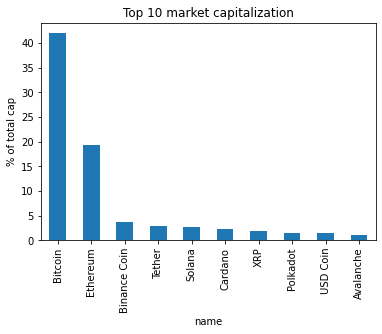

In [91]:
#Plotting the barplot with the title defined above 
ax = df['market_cap_dominance'][:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 market capitalization' , ylabel='% of total cap');


In [94]:
# Calculating total price
df['total_volume_24h_perc'] = (df['volume_24h']/ df.volume_24h.sum()) *100
df['total_volume_24h_perc'] 

name
Bitcoin          16.023475
Ethereum          8.741146
Binance Coin      1.120284
Tether           40.022657
Solana            1.795808
                   ...    
Ravencoin         0.030974
Voyager Token     0.079395
yearn.finance     0.106034
Revain            0.001416
Zilliqa           0.035512
Name: total_volume_24h_perc, Length: 100, dtype: float64

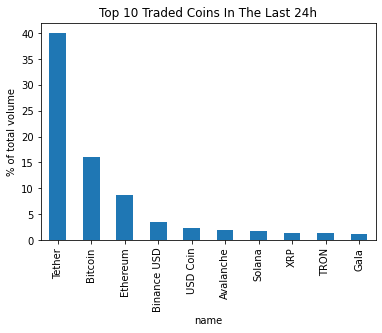

In [100]:
#Plotting the barplot with the title defined above 
ax = df['total_volume_24h_perc'].sort_values(ascending=False)[:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 Traded Coins In The Last 24h' , ylabel='% of total volume');

#### Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [109]:
# Selecting the name, volume_change_24h and volume_change_7d columns
volatility = df[['volume_change_1h', 'volume_change_24h','volume_change_7d','volume_change_30d', 'volume_change_60d','volume_change_90d']]

# Setting the index to 'name' and dropping all NaN rows 

volatility = volatility.dropna()

# Sorting the DataFrame by volume_change_24h in ascending order
volatility = volatility.sort_values(by = "volume_change_24h" , ascending = True)


# Checking the first few rows
volatility.head(10)

,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
name,,,,,,
Gala,0.031662,-19.707150,274.821183,348.526753,246.099890,1217.966210
Kadena,3.124632,-8.582368,-19.418214,321.419082,850.549742,2127.458269
Arweave,0.672488,-7.868882,-9.013194,17.949963,24.735781,114.006075
Nexo,0.131858,-6.756134,-12.807660,16.113259,91.938738,44.235231
Helium,0.148996,-6.682044,-14.060593,104.006305,134.473590,78.295237
KuCoin Token,1.087204,-5.662961,-13.095128,59.097980,125.208806,70.757666
Enjin Coin,0.438603,-5.242860,3.565904,81.950387,135.839402,61.805361
Quant,-0.420512,-5.106150,-17.149523,-24.097606,-31.127303,20.948234
Kusama,0.091153,-4.673679,-19.561865,-8.098206,1.293090,9.477626


#### Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

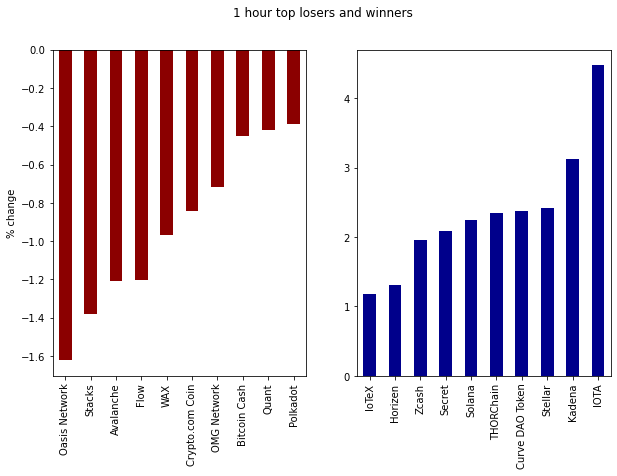

In [113]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_1h.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "1 hour top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_1h.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");


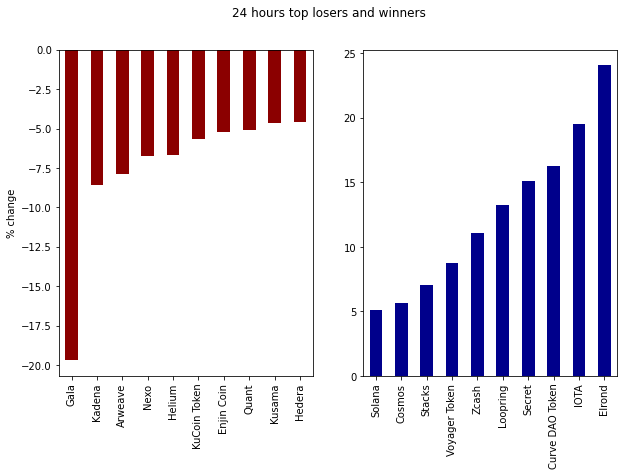

In [112]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_24h[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "24 hours top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_24h[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

    
    

#### Lets check for  weekly 

Text(0.5, 0, '')

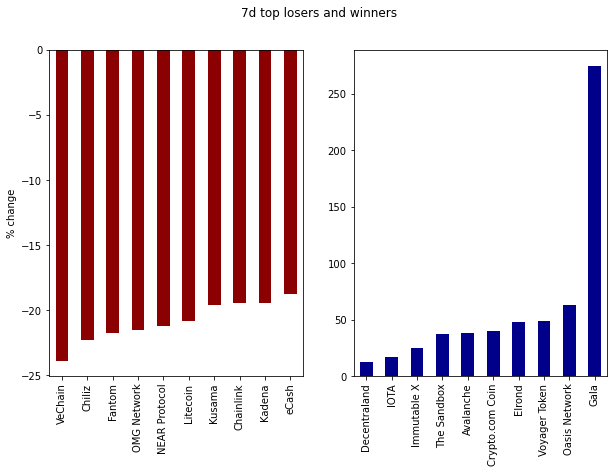

In [114]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility7d = volatility.sort_values(by = "volume_change_7d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_7d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "7d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_7d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Top Gainers and Losers for 30 days**

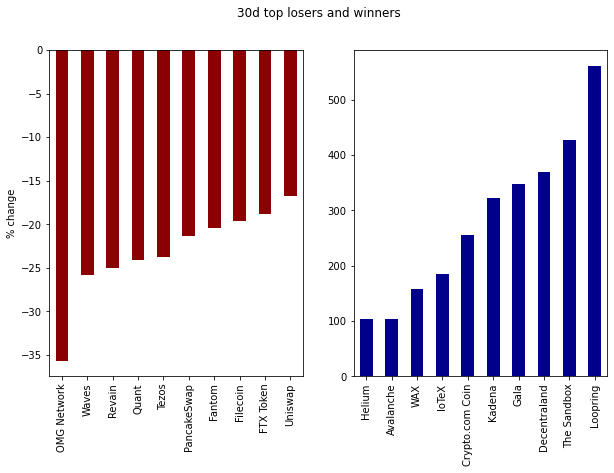

In [118]:


# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_30d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "30d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_30d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

**Top Gainers and Losers for 60 days**

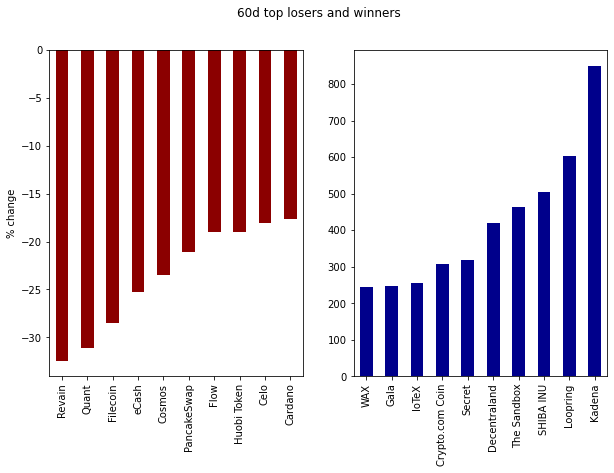

In [119]:

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_60d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "60d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_60d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

#### Lets check for 90days

Text(0.5, 0, '')

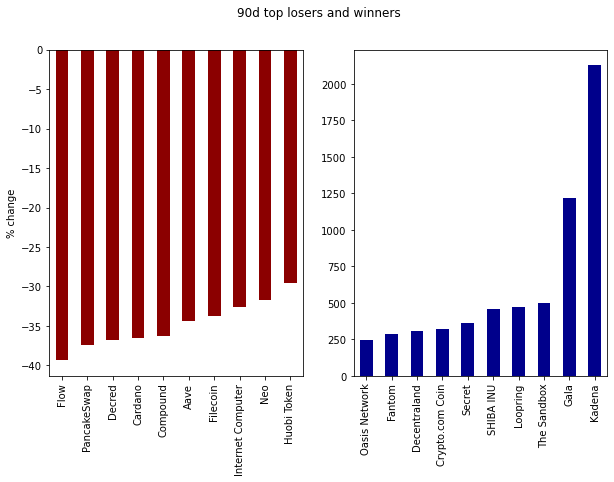

In [115]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility90d = volatility.sort_values(by = "volume_change_90d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_90d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "90d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_90d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Looking at the Market Cap**


Market cap allows you to compare the total value of one cryptocurrency with another so you can make more informed investment decisions. Cryptocurrencies are classified by their market cap into three categories:

- Large-cap cryptocurrencies, including Bitcoin and Ethereum, have a market cap of more than ```$10 billion```. Investors consider them to be lower risk investments because they have a demonstrated track-record of growth and often have higher liquidity — meaning they can withstand a higher volume of people cashing out without the price being dramatically impacted.

- Mid-cap cryptocurrencies have market caps between ```$1 billion and $10 billion``` – they generally are considered to have more untapped potential upside but also higher risk. 

- Small-cap cryptocurrencies have a market cap of less than ```$1 billion``` and are most susceptible to dramatic swings based on market sentiment. 

<AxesSubplot:>

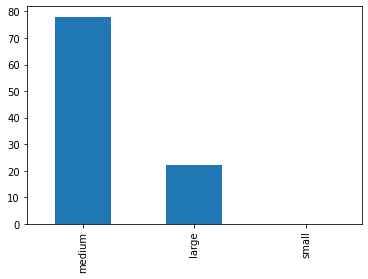

In [207]:
bins = [0,1000000000,10000000000,5000000000000]
labels = ['small','medium','large']
df['cap'] = pd.cut(df['market_cap'],bins,labels=labels)
df['cap'].value_counts().plot(kind='bar')

In [213]:
df[df['cap']=='large'].index

Index(['Bitcoin', 'Ethereum', 'Binance Coin', 'Tether', 'Solana', 'Cardano',
       'XRP', 'Polkadot', 'USD Coin', 'Avalanche', 'Dogecoin', 'SHIBA INU',
       'Crypto.com Coin', 'Terra', 'Litecoin', 'Wrapped Bitcoin', 'Uniswap',
       'Binance USD', 'Chainlink', 'Algorand', 'Polygon', 'Bitcoin Cash'],
      dtype='object', name='name')

In [214]:
df[df['cap']=='medium'].index

Index(['Elrond', 'Stellar', 'VeChain', 'Axie Infinity', 'Internet Computer',
       'TRON', 'TerraUSD', 'FTX Token', 'Cosmos', 'Decentraland', 'THETA',
       'Dai', 'Ethereum Classic', 'Filecoin', 'Bitcoin BEP2', 'Hedera',
       'NEAR Protocol', 'Fantom', 'Tezos', 'Helium', 'Flow', 'Monero', 'IOTA',
       'The Graph', 'EOS', 'Klaytn', 'PancakeSwap', 'Loopring', 'The Sandbox',
       'Aave', 'Harmony', 'UNUS SED LEO', 'eCash', 'Bitcoin SV', 'Kusama',
       'Maker', 'Neo', 'Stacks', 'THORChain', 'Zcash', 'Enjin Coin', 'Kadena',
       'Quant', 'Gala', 'Chiliz', 'Holo', 'Waves', 'BitTorrent', 'Amp',
       'Arweave', 'Dash', 'Celo', 'Curve DAO Token', 'KuCoin Token', 'IoTeX',
       'Compound', 'Theta Fuel', 'Huobi Token', 'NEM', 'Nexo',
       'Basic Attention Token', 'ICON', 'Qtum', 'Decred', 'WAX', 'OKB',
       'Immutable X', 'Mina', 'Oasis Network', 'OMG Network', 'TrueUSD',
       'Horizen', 'Secret', 'Ravencoin', 'Voyager Token', 'yearn.finance',
       'Revain', 'Zilliqa'],
  

In [145]:
df.drop(['date_added','last_updated'],axis=1,inplace=True)

In [209]:
df.groupby('cap').mean()[['volume_24h','volume_change_1h','volume_change_24h','volume_change_7d','volume_change_30d','volume_change_60d','volume_change_90d']]

,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
cap,,,,,,,
small,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium,3.944070e+08,0.352492,-0.414111,-2.216252,36.470102,65.059784,88.169383
large,7.327017e+09,0.084195,-1.553538,-7.068743,17.203262,55.994408,56.166929


we see that the medium cap coins are performing better in every category over the past 90 days.

<AxesSubplot:>

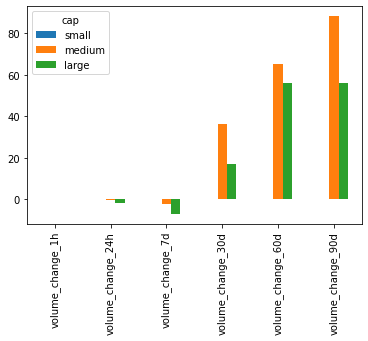

In [217]:
df.groupby('cap').mean()[['volume_change_1h','volume_change_24h','volume_change_7d','volume_change_30d','volume_change_60d','volume_change_90d']].T.plot(kind='bar')

#### Rolling Mean (Moving Average) & Bollinger bands — to determine a trend and volatilty 

A simple moving average, also called a rolling or running average is formed by computing the average price of a security over a specific number of periods. Most moving averages are based on closing prices; for example, a 5-day simple moving average is the five-day sum of closing prices divided by five. As its name implies, a moving average is an average that moves. Old data is dropped as new data becomes available, causing the average to move along the time scale

Bollinger bands are a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis. The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations below the SMA.

The easiest way to calculate the simple moving average is by using the pandas.Series.rolling method. This method provides rolling windows over the data.

In this analysis we will be using a window of 30 for the past 30 days of bitcoin and 2 standard deviations for the bollinger bands.

We will be using the Coingecko API as we are not able to get historical data from CoinMarketCap.

In [152]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


In [155]:
bitcoin_price = cg.get_coin_market_chart_by_id('bitcoin','usd','30')
bit_time = [i[0] for i in bitcoin_price['prices']]
bit_prices = [i[1] for i in bitcoin_price['prices']]
bit_market_caps = [i[1] for i in bitcoin_price['market_caps']]
bit_total_volumes = [i[1] for i in bitcoin_price['total_volumes']]

In [157]:
cg_df = pd.DataFrame({'time':bit_time,'price':bit_prices,'market_caps':bit_market_caps,'total_volumes':bit_total_volumes})
cg_df['time'] = pd.to_datetime((cg_df['time']/1000),unit='s')

In [159]:
cg_df = cg_df.set_index('time')

In [176]:
cg_df['ma_rolling_30-Day'] = cg_df.price.rolling(window=30).mean()
cg_df['std'] = cg_df.price.rolling(window=30).std()
cg_df['upper'] = cg_df['ma_rolling_30-Day'] + 2*cg_df['std']
cg_df['lower'] = cg_df['ma_rolling_30-Day']- 2*cg_df['std']
cg_df

,price,market_caps,total_volumes,ma_rolling_30-Day,std,upper,lower
time,,,,,,,
2021-10-23 14:05:54.220000000,61681.843692,1.161498e+12,3.727233e+10,NaN,NaN,NaN,NaN
2021-10-23 15:01:26.459000064,61435.439335,1.158184e+12,3.514264e+10,NaN,NaN,NaN,NaN
2021-10-23 16:11:37.512000000,61735.657781,1.162345e+12,3.336309e+10,NaN,NaN,NaN,NaN
2021-10-23 17:08:08.236000000,61444.877411,1.157697e+12,3.224670e+10,NaN,NaN,NaN,NaN
2021-10-23 18:00:26.382999808,61378.196523,1.151084e+12,3.183777e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-22 10:01:56.987000064,57262.178416,1.084762e+12,2.971322e+10,58762.994120,925.469618,60613.933357,56912.054884
2021-11-22 11:01:53.740000000,57326.609042,1.081447e+12,3.010401e+10,58709.202471,961.020724,60631.243919,56787.161023
2021-11-22 12:03:07.315000064,57464.186747,1.084936e+12,2.997047e+10,58649.971307,981.644298,60613.259903,56686.682710


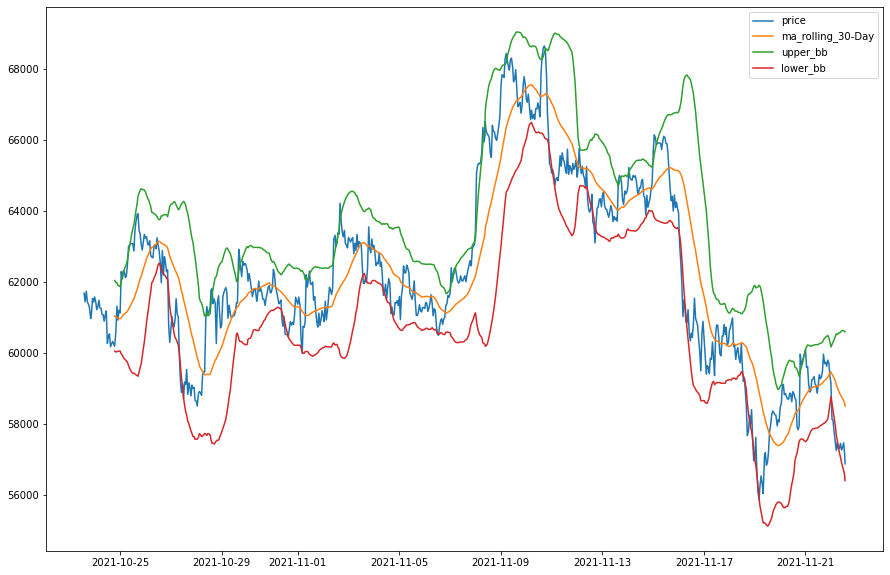

In [212]:
plt.figure(figsize=(15,10))

plt.plot(cg_df[['price','ma_rolling_30-Day','upper','lower']])
plt.legend(['price','ma_rolling_30-Day','upper_bb','lower_bb']);

In [183]:
df1

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28T00:00:00.000Z,1,1.888011e+07,2021-11-22T11:18:02.000Z,57439.882320,3.075836e+10,0.062070,-2.677651,-12.767754,-5.821410,31.589210,16.603848,1.084471e+12,41.9645,1,"Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,880,112. The last known price of Bitcoin is 57,381.21625009 USD and is down -2.28 over the last 24 hours. It is currently trading on 8316 active market(s) with $30,717,186,089.71 traded over the last 24 hours. More information can be found at https://bitcoin.org/.",,"{'website': ['https://bitcoin.org/'], 'twitter': [], 'message_board': ['https://bitcointalk.org'], 'chat': [], 'facebook': [], 'explorer': ['https://blockchain.coinmarketcap.com/chain/bitcoin', 'https://blockchain.info/', 'https://live.blockcypher.com/btc/', 'https://blockchair.com/bitcoin', 'https://explorer.viabtc.com/btc'], 'reddit': ['https://reddit.com/r/bitcoin'], 'technical_doc': ['https://bitcoin.org/bitcoin.pdf'], 'source_code': ['https://github.com/bitcoin/bitcoin'], 'announcement': []}",
1,Ethereum,2015-08-07T00:00:00.000Z,2,1.184426e+08,2021-11-22T11:18:02.000Z,4203.009989,1.677934e+10,-0.010659,-2.860315,-11.120895,4.919153,36.904883,26.849820,4.978156e+11,19.2650,1027,"Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 118,442,633.1865. The last known price of Ethereum is 4,191.27608745 USD and is down -2.94 over the last 24 hours. It is currently trading on 4667 active market(s) with $16,712,977,256.39 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.",,"{'website': ['https://www.ethereum.org/', 'https://en.wikipedia.org/wiki/Ethereum'], 'twitter': ['https://twitter.com/ethereum'], 'message_board': ['https://forum.ethereum.org/', 'https://ethresear.ch/'], 'chat': ['https://gitter.im/orgs/ethereum/rooms'], 'facebook': [], 'explorer': ['https://etherscan.io/', 'https://ethplorer.io/', 'https://blockchair.com/ethereum', 'https://bscscan.com/token/0x2170ed0880ac9a755fd29b2688956bd959f933f8', 'https://eth.tokenview.com/en/blocklist'], 'reddit': ['https://reddit.com/r/ethereum'], 'technical_doc': ['https://github.com/ethereum/wiki/wiki/White-Paper'], 'source_code': ['https://github.com/ethereum'], 'announcement': ['https://bitcointalk.org/index.php?topic=428589.0']}",ethereum
2,Binance Coin,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T11:17:09.000Z,573.692693,2.150476e+09,0.091341,-1.865748,-11.199885,19.618707,54.298186,17.528127,9.569260e+10,3.7032,1839,"Binance Coin (BNB) is a cryptocurrency . Binance Coin has a current supply of 166,801,148. The last known price of Binance Coin is 571.5959597 USD and is down -1.72 over the last 24 hours. It is currently trading on 561 active market(s) with $2,133,947,235.83 traded over the last 24 hours. More information can be found at https://www.binance.com/.",,"{'website': ['https://www.binance.com/'], 'twitter': ['https://twitter.com/binance'], 'message_board': [], 'chat': ['https://t.me/binanceexchange'], 'facebook': [], 'explorer': ['https://explorer.binance.org/', 'https://etherscan.io/token/0xB8c77482e45F1F44dE1745F52C74426C631bDD52', 'https://bscscan.com/token/0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c', 'https://blockchair.com/ethereum/erc-20/token/0xb8c77482e45f1f44de1745f52c74426c631bdd52'], 'reddit': ['https://reddit.com/r/binance'], 'technical_doc': [], 'source_code': [], 'announcement': []}",binance
3,Tether,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T11:17:10.000Z,0.999959,7.682674e+10,-0.078326,-0.058103,-0.003183,-0.046491,-0.055189,-0.103691,7.308354e+10,2.8322,825,"Tether (USDT) is a cryptocurrency and operat